In [1]:
import numpy as np
from math import sqrt
from pprint import pprint
from sklearn import datasets
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings(action='ignore',module='sklearn')

In [3]:
# Cargar y explorar los datos
datos = datasets.load_boston()
print(np.shape(datos.data))

(506, 13)


In [4]:
# Extraer la matriz de datos "X" y la variable target "y"
X = datos.data
y = datos.target

In [5]:
# Partición EXTERNA: hold-out split 80% train - 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Estandarización de los datos de entrenamiento y test
stdr = preprocessing.StandardScaler()
X_train = stdr.fit_transform(X_train)
X_test = stdr.transform(X_test)

In [7]:
# Métricas de evaluación.
metricas = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(mean_squared_error(y, y_pred)),
                      greater_is_better=False),
    'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False)}

In [8]:
# Definimos un algoritmo SVM de regresión
alg = SVR(C=100, gamma='auto', kernel='rbf')

In [9]:
# Validación y evaluación del modelo.
# en "cv = KFold(n_splits=5)" se hace un cross-validation INTERNO!! 
results = cross_validate(alg, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)

In [10]:
# Presentación de los resultados de la evaluación.
pprint(results)

{'fit_time': array([0.07000685, 0.02109623, 0.02252388, 0.02211189, 0.022578  ]),
 'score_time': array([0.00446677, 0.00351715, 0.00299859, 0.00322008, 0.00364494]),
 'test_MAE': array([-2.53321657, -1.97577853, -2.749176  , -2.49085082, -1.87265003]),
 'test_MAPE': array([-13.62035794,  -9.52217681, -11.39432082, -11.49564794,
       -11.1700813 ]),
 'test_MSE': array([-15.39579362,  -7.10759271, -30.3102962 , -12.62322446,
        -6.4009247 ]),
 'test_RMSE': array([-3.9237474 , -2.66600689, -5.50547874, -3.55291774, -2.53000488])}


In [11]:
# Una vez hemos optimizado los hiperparámetros en el conjunto de validación, entrenamos un nuevo modelo que contenga
# todos los datos de entrenamiento (es decir, train + validation) para evaluar el test
model = SVR(C=100, gamma='auto', kernel='rbf')
model = model.fit(X_train, y_train)

In [12]:
# Extraemos el error absoluto promedio (MAE) del conjunto de test
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Test results (MAE): ', np.round(mae,4))
print('Test results (r2): ', np.round(r2,4))

Test results (MAE):  2.0675
Test results (r2):  0.8379


In [13]:
# También podemos extraer las predicciones para cuánto difieren los valores predichos de los reales
print('Predicciones:   ', np.round(y_pred[:10], 1))
print('Valores reales: ', y_test[:10])

Predicciones:    [26.2 32.1 14.7 22.1 16.1 21.2 19.2 15.8 21.4 19.9]
Valores reales:  [23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8]


In [14]:
# Get regression graphics
def report_regression_graphics(y_true, y_pred):
    fig, ax = plt.subplots(2,1)

    # Plot linear fit
    ax[0].scatter(y_true, y_pred)
    ax[0].set_ylabel('y_pred')
    ax[0].set_title('Regression line')
    ax[0].grid()
    # overlay the regression line
    z = np.polyfit(np.float64(y_true), y_pred, 1)
    p = np.poly1d(z)
    ax[0].plot(y_true, p(y_true), color='magenta')

    # Plot bisectriz
    ax[1].scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax[1].set_xlabel('y_true')
    ax[1].set_ylabel('y_pred')
    ax[1].set_title('Bisector')
    ax[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax[1].grid()

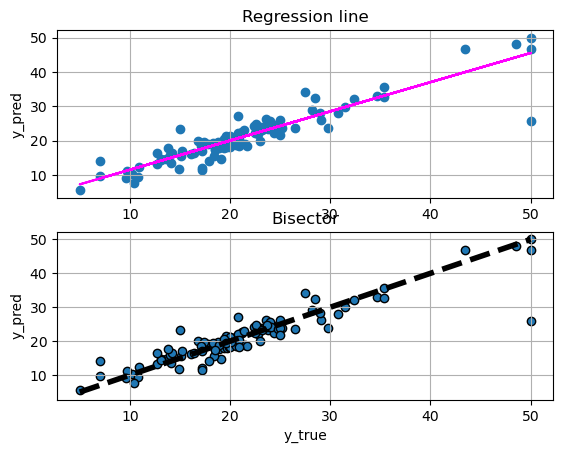

In [15]:
report_regression_graphics(y_test, y_pred)